In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [2]:
data=pd.read_csv("/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data=pd.DataFrame(data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
data["gender"].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [6]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [7]:
f=data[data.gender=="Female"] #kötü huylu tümör
m=data[data.gender=="Male"]  # iyi huylu tümör

In [8]:
data.gender=[1 if each=="Male" else 0 for each in data.gender]

In [9]:
data["gender"].value_counts()

gender
0    2501
1    2500
Name: count, dtype: int64

In [10]:
# x=feature 
# y=class 

x=data.drop(["gender"],axis=1)
y=data.gender.values

In [11]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [12]:
y

array([1, 0, 1, ..., 0, 0, 1])

In [13]:
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

print("test accuracy: {} ".format(lr.fit(x_train, y_train).score(x_test, y_test))) #score predict et daha sonra score ver
print("train accuracy: {} ".format(lr.fit(x_train, y_train).score(x_train, y_train)))  #score predict et daha sonra score ver

test accuracy: 0.9630369630369631 
train accuracy: 0.9665 


In [16]:
y_pred=lr.predict(x_test)  # tahmin edilen datada bakmamız gerekir 
y_true=y_test  #test datası gerçek datadır

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[487,  15],
       [ 22, 477]])

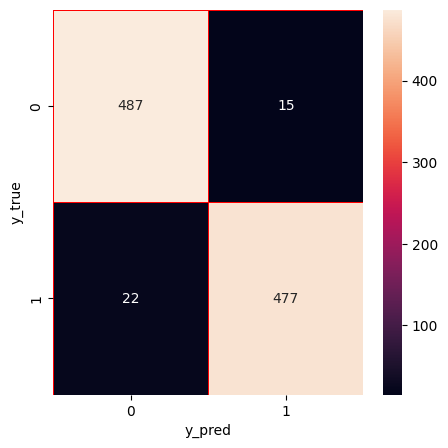

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
prediction

array([1, 0, 0, ..., 0, 1, 0])

In [20]:
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.964035964035964 


How to find the most appropriate k value? Since the k value here is a hyperparameter, let's find the most appropriate one.

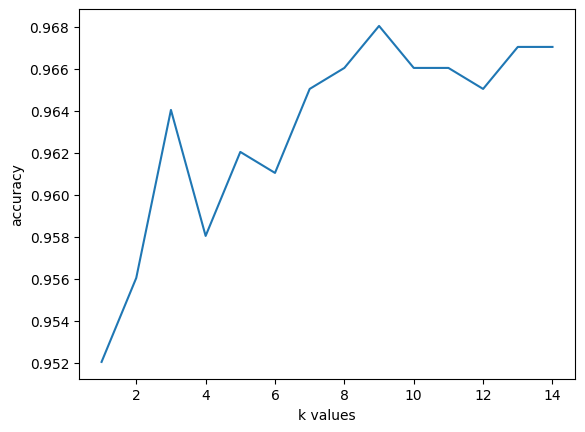

In [21]:
#find k value
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    knn2.predict(x_test)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.968031968031968 


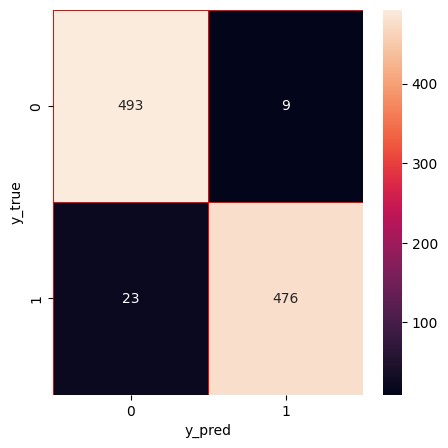

In [23]:
y_pred=knn.predict(x_test)  # tahmin edilen datada bakmamız gerekir 
y_true=y_test  #test datası gerçek datadır
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)


f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# SVM

In [24]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

print accuracy of svm algo:  0.9630369630369631


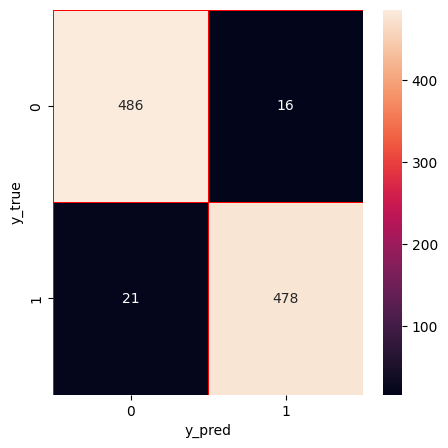

In [25]:
y_pred=svm.predict(x_test)  # tahmin edilen datada bakmamız gerekir 
y_true=y_test  #test datası gerçek datadır
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)


f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

prediction=nb.predict(x_test)
print("Score: ",nb.score(x_test,y_test))

Score:  0.964035964035964


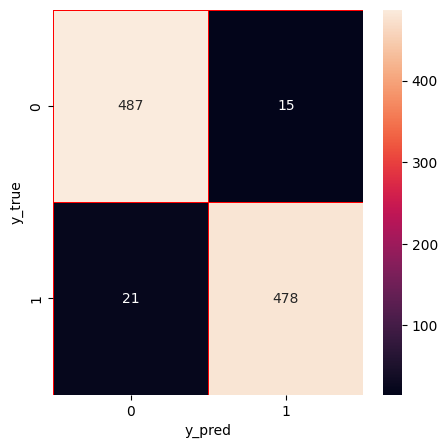

In [27]:
y_pred=nb.predict(x_test)  # tahmin edilen datada bakmamız gerekir 
y_true=y_test  #test datası gerçek datadır
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)


f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
print("score: ", tree.score(x_test,y_test))

score:  0.952047952047952


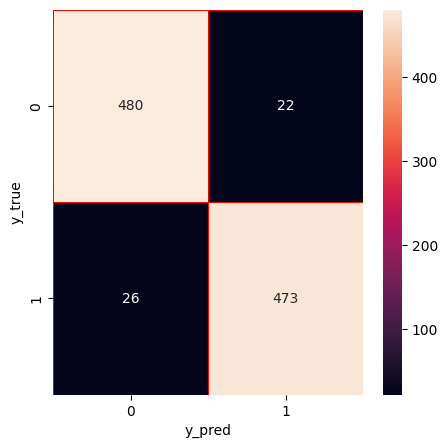

In [29]:
y_pred=tree.predict(x_test)  # tahmin edilen datada bakmamız gerekir 
y_true=y_test  #test datası gerçek datadır
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)


f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Random Forest

In [30]:
##random forest

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 200,random_state = 1)  #n_estimators = 100 kaç tree olsun
rf.fit(x_train,y_train)
print("Random Forest score: ", rf.score(x_test,y_test))

Random Forest score:  0.962037962037962


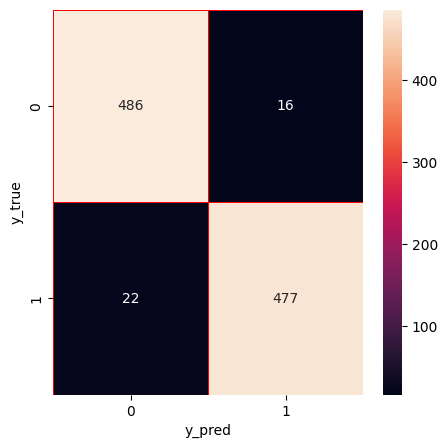

In [31]:
y_pred=rf.predict(x_test)  # tahmin edilen datada bakmamız gerekir 
y_true=y_test  #test datası gerçek datadır
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)


f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()